In [115]:
import pickle
import wget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import json
import warnings
warnings.simplefilter('ignore')
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [116]:
df = pd.read_csv("bank.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [117]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [119]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [120]:
df.y.value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [121]:
df.rename(columns = {'y' : 'score'}, inplace=True)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,score
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [122]:
df.score = (df.score == 'yes').astype(int)
df.score.value_counts()

0    4000
1     521
Name: score, dtype: int64

In [123]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

###  EDA
#### Univariate Analysis

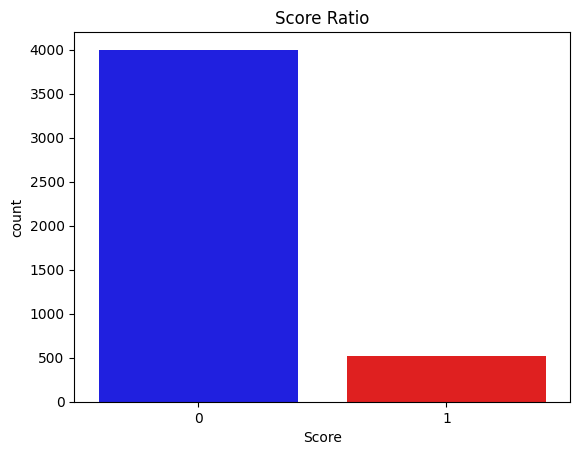

In [124]:
plt.title('Score Ratio')
sns.countplot(data=df, x='score', palette = ['Blue', 'Red'])
plt.xlabel('Score')
plt.show()

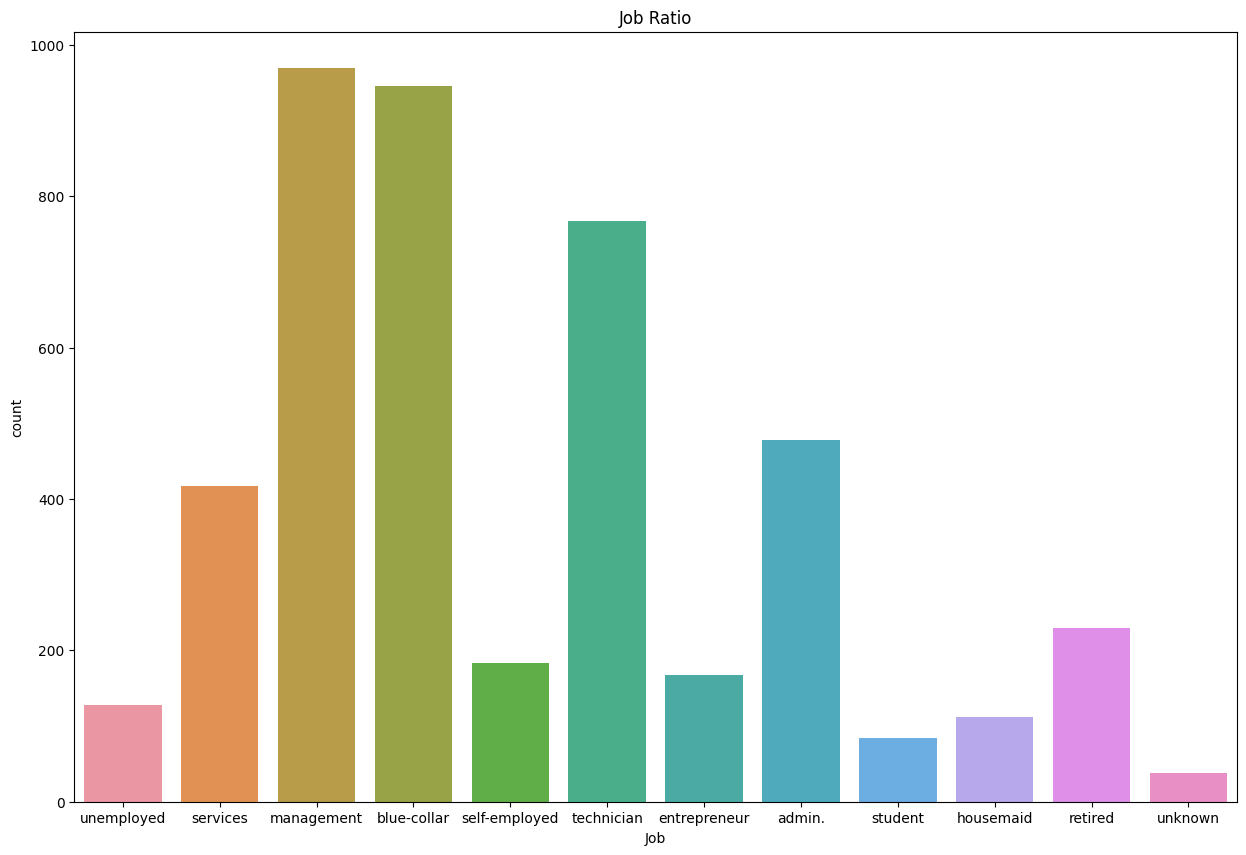

In [125]:
plt.figure(figsize=(15, 10))
plt.title('Job Ratio')
sns.countplot(data=df, x='job', orient="H")
plt.xlabel('Job')
plt.show()

In [126]:
df.education.value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

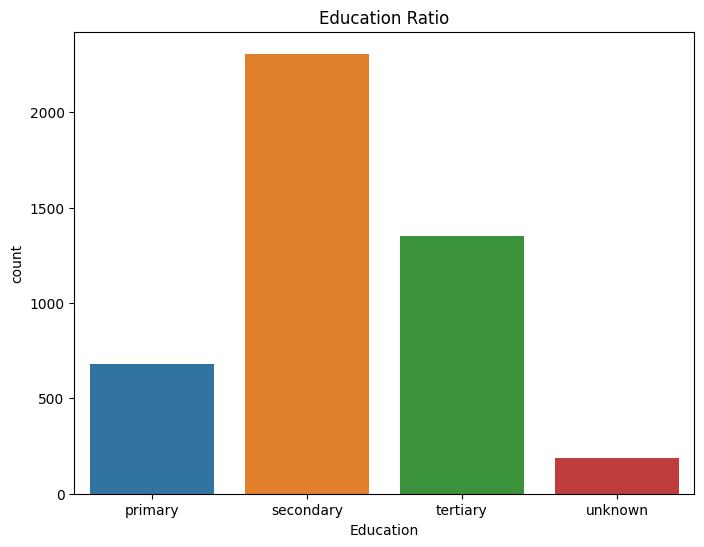

In [127]:
plt.figure(figsize=(8, 6))
plt.title('Education Ratio')
sns.countplot(data=df, x='education', orient="H")
plt.xlabel('Education')
plt.show()

In [128]:
df.poutcome.value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

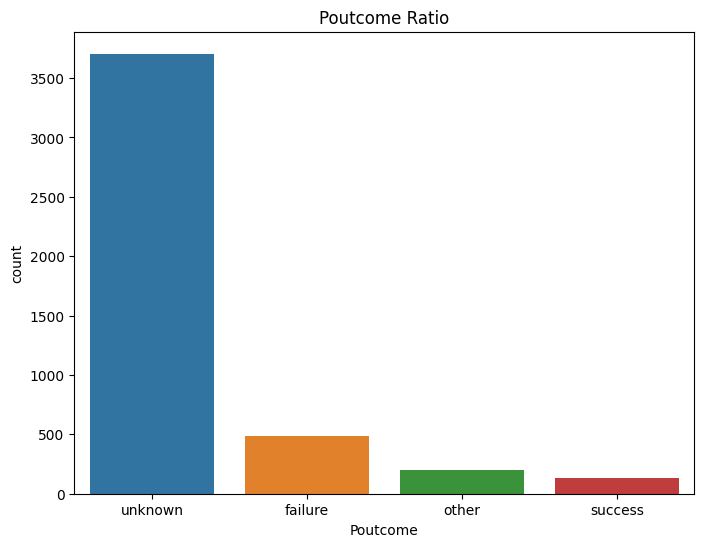

In [129]:
plt.figure(figsize=(8, 6))
plt.title('Poutcome Ratio')
sns.countplot(data=df, x='poutcome', orient="H")
plt.xlabel('Poutcome')
plt.show()

### Bivariate analysis

<Axes: xlabel='job', ylabel='score'>

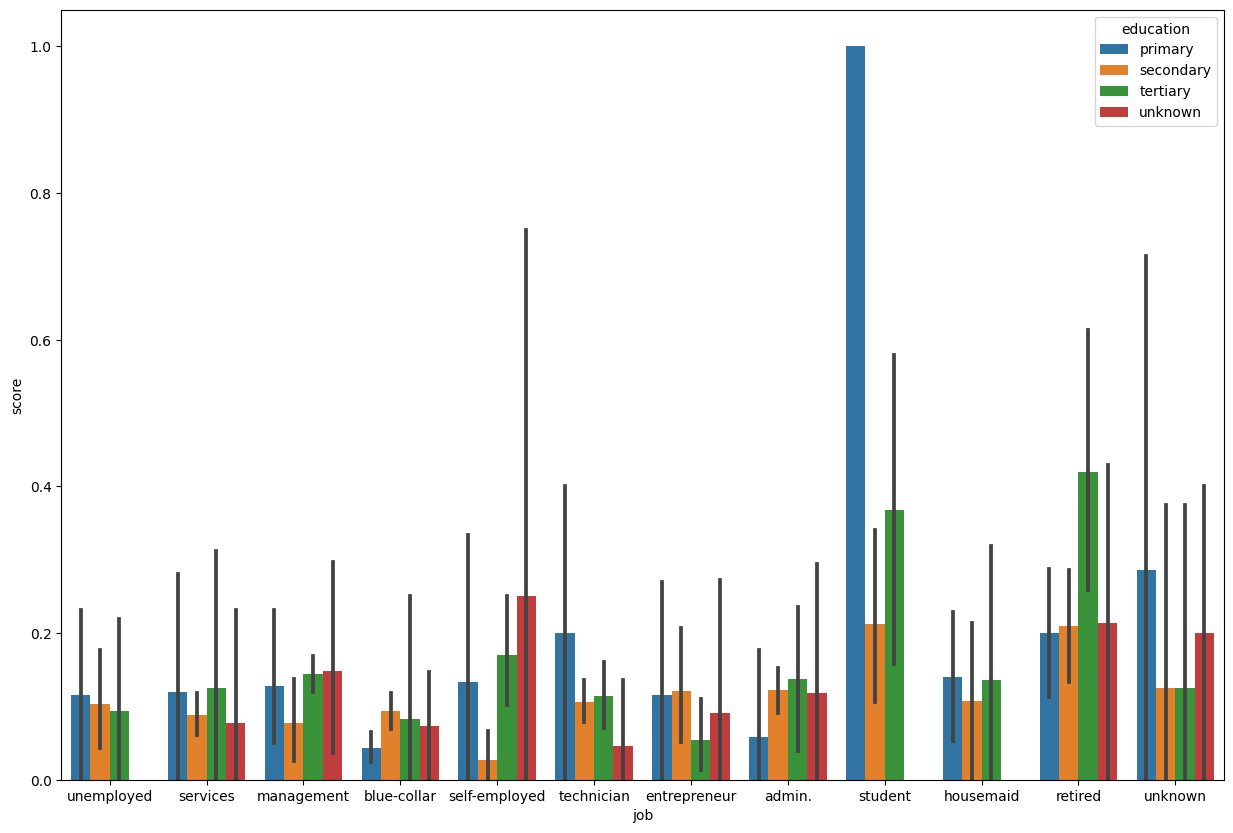

In [130]:
plt.figure(figsize=(15, 10))
sns.barplot(x="job", y="score", hue="education", data=df)

<Axes: xlabel='poutcome', ylabel='score'>

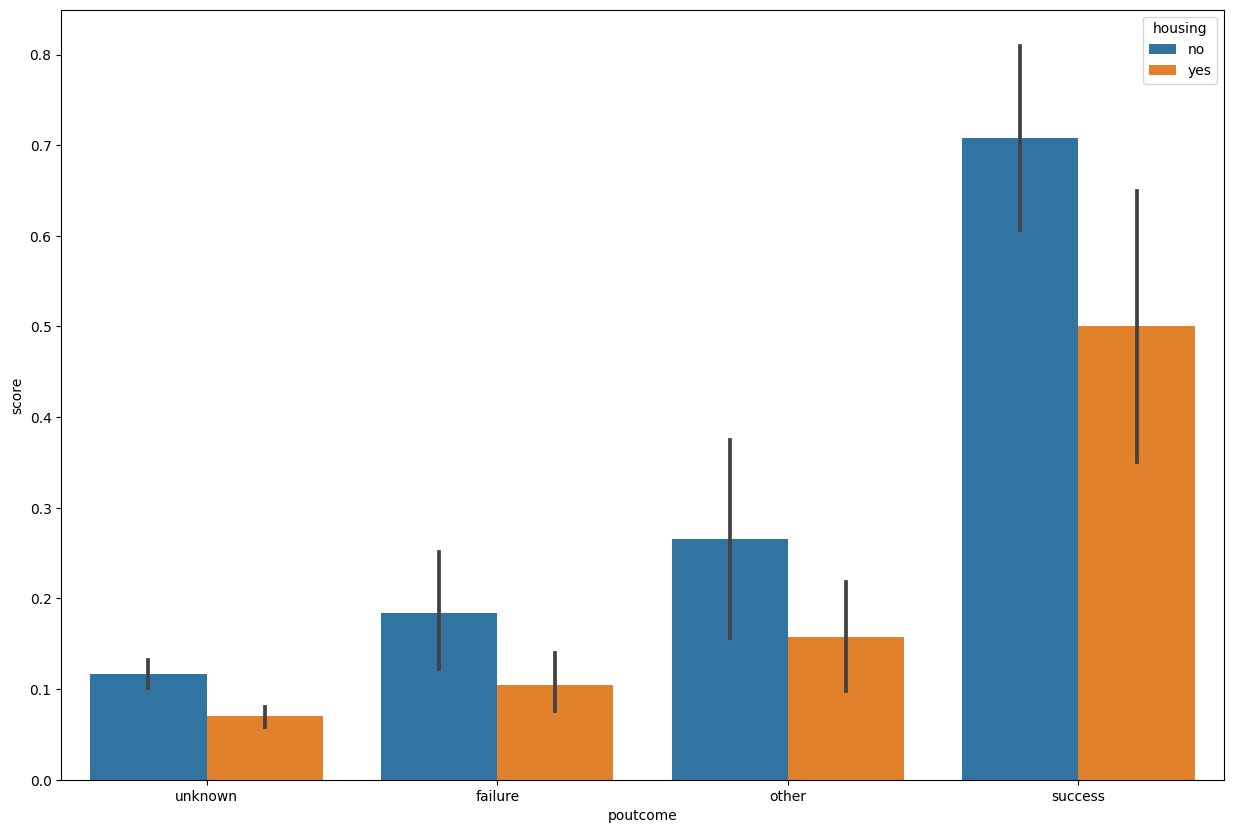

In [132]:
plt.figure(figsize=(15, 10))
sns.barplot(x="poutcome", y="score", hue="housing", data=df)

### Feature Engineering

In [133]:
#we will be using few features for training
#But first let's split the data
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [134]:
df_full_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,score
2456,59,technician,married,primary,no,3163,yes,no,unknown,29,may,240,2,-1,0,unknown,0
4114,34,blue-collar,married,secondary,no,250,yes,no,unknown,29,may,193,6,-1,0,unknown,0
757,50,admin.,married,secondary,no,231,yes,no,cellular,21,nov,397,2,-1,0,unknown,0
2826,39,management,married,tertiary,no,763,yes,no,cellular,11,may,877,7,300,2,other,1
1232,36,technician,single,secondary,no,1521,yes,no,unknown,16,jun,243,2,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,33,admin.,married,secondary,no,220,yes,no,unknown,27,may,345,1,-1,0,unknown,0
2763,57,services,married,tertiary,no,10,no,no,telephone,8,jul,320,3,-1,0,unknown,0
905,28,services,single,secondary,no,198,no,no,cellular,5,jul,128,2,-1,0,unknown,1
3980,45,blue-collar,married,secondary,no,784,yes,yes,unknown,3,jun,34,1,-1,0,unknown,0


In [135]:
#split df_full_train into df_val(validation data)
#test size =0.25 because the df_full_train df is 80% of the original df
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state=1)

In [136]:
len(df_train), len(df_val), len(df_full_train), len(df_test), len(df)

(2712, 904, 3616, 905, 4521)

In [137]:
#reset the indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [138]:
#split the score column from the rest of the dataframe
y_train = df_train.score.values
y_val = df_val.score.values
y_test = df_test.score.values

In [139]:
del df_train['score']
del df_val['score']
del df_test['score']

In [140]:
#check for missing values
df_full_train = df_full_train.reset_index(drop=True)

In [141]:
df_full_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,score
0,59,technician,married,primary,no,3163,yes,no,unknown,29,may,240,2,-1,0,unknown,0
1,34,blue-collar,married,secondary,no,250,yes,no,unknown,29,may,193,6,-1,0,unknown,0
2,50,admin.,married,secondary,no,231,yes,no,cellular,21,nov,397,2,-1,0,unknown,0
3,39,management,married,tertiary,no,763,yes,no,cellular,11,may,877,7,300,2,other,1
4,36,technician,single,secondary,no,1521,yes,no,unknown,16,jun,243,2,-1,0,unknown,0


In [142]:
#pick the feature we will use
features = ['job','duration', 'poutcome']

In [143]:
#avoid creating sparse matrix
dv = DictVectorizer(sparse= False)

In [144]:
#turn categorical and numerical varaibles into dicts
train_dicts = df_train[features].to_dict(orient = 'records')

In [145]:
# convert the dicts into vector format
X_train = dv.fit_transform(train_dicts)
X_train.shape

(2712, 17)

In [146]:
model = LogisticRegression(max_iter=len(X_train))

In [147]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=2712)

In [148]:
#for validation data 
val_dict = df_val[features].to_dict(orient = 'records')

In [149]:
X_val = dv.fit_transform(val_dict)

In [150]:
y_pred = model.predict_proba(X_val)[:, 1]

In [151]:
score_decision = (y_pred >= 0.5)
score_decision

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,  True,  True, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [152]:
model_acc = (y_val == score_decision).mean()
print("Accuracy of model is %.3f" %model_acc)

Accuracy of model is 0.916
